In [1]:
# Exploratory Data Analysis on Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
#1 Loading Dataset
df = pd.read_csv('Cardiotocographic.csv')

print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
# Data Info
print('\nDataset Info:')
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
# Convert all columns to numeric (safety step)
df = df.apply(pd.to_numeric, errors='coerce')

In [5]:
# Missing values
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

In [7]:
#3 Outlier Detection using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape After Outlier Removal:", df.shape)


Shape After Outlier Removal: (883, 14)


In [8]:
#2 Statistical Summary
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = Q3 - Q1

print("\nStatistical Summary:")
summary


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,883.0,131.842621,9.461012,106.000000,125.000000,133.000000,138.000000,160.000000,133.000000,14.000000
AC,883.0,0.004071,0.003726,-0.000122,0.000000,0.003350,0.006719,0.013861,0.003350,0.005606
FM,883.0,0.000603,0.001337,-0.002467,0.000000,0.000000,0.000336,0.006272,0.000000,0.002567
UC,883.0,0.004952,0.002718,-0.000101,0.003098,0.005051,0.006927,0.012072,0.005051,0.004685
DL,883.0,0.001545,0.002218,-0.000124,0.000000,0.000000,0.003084,0.008197,0.000000,0.003289
DS,883.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,883.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,883.0,42.401260,15.079872,15.000000,29.000000,41.000000,56.000000,79.000000,41.000000,29.000000
MSTV,883.0,1.271275,0.538496,0.300000,0.900000,1.200000,1.600000,3.200000,1.200000,1.000000
ALTV,883.0,3.170071,6.036208,-1.043619,0.000000,0.000000,4.000000,27.000000,0.000000,11.000000


In [9]:
#3 Data Visualization

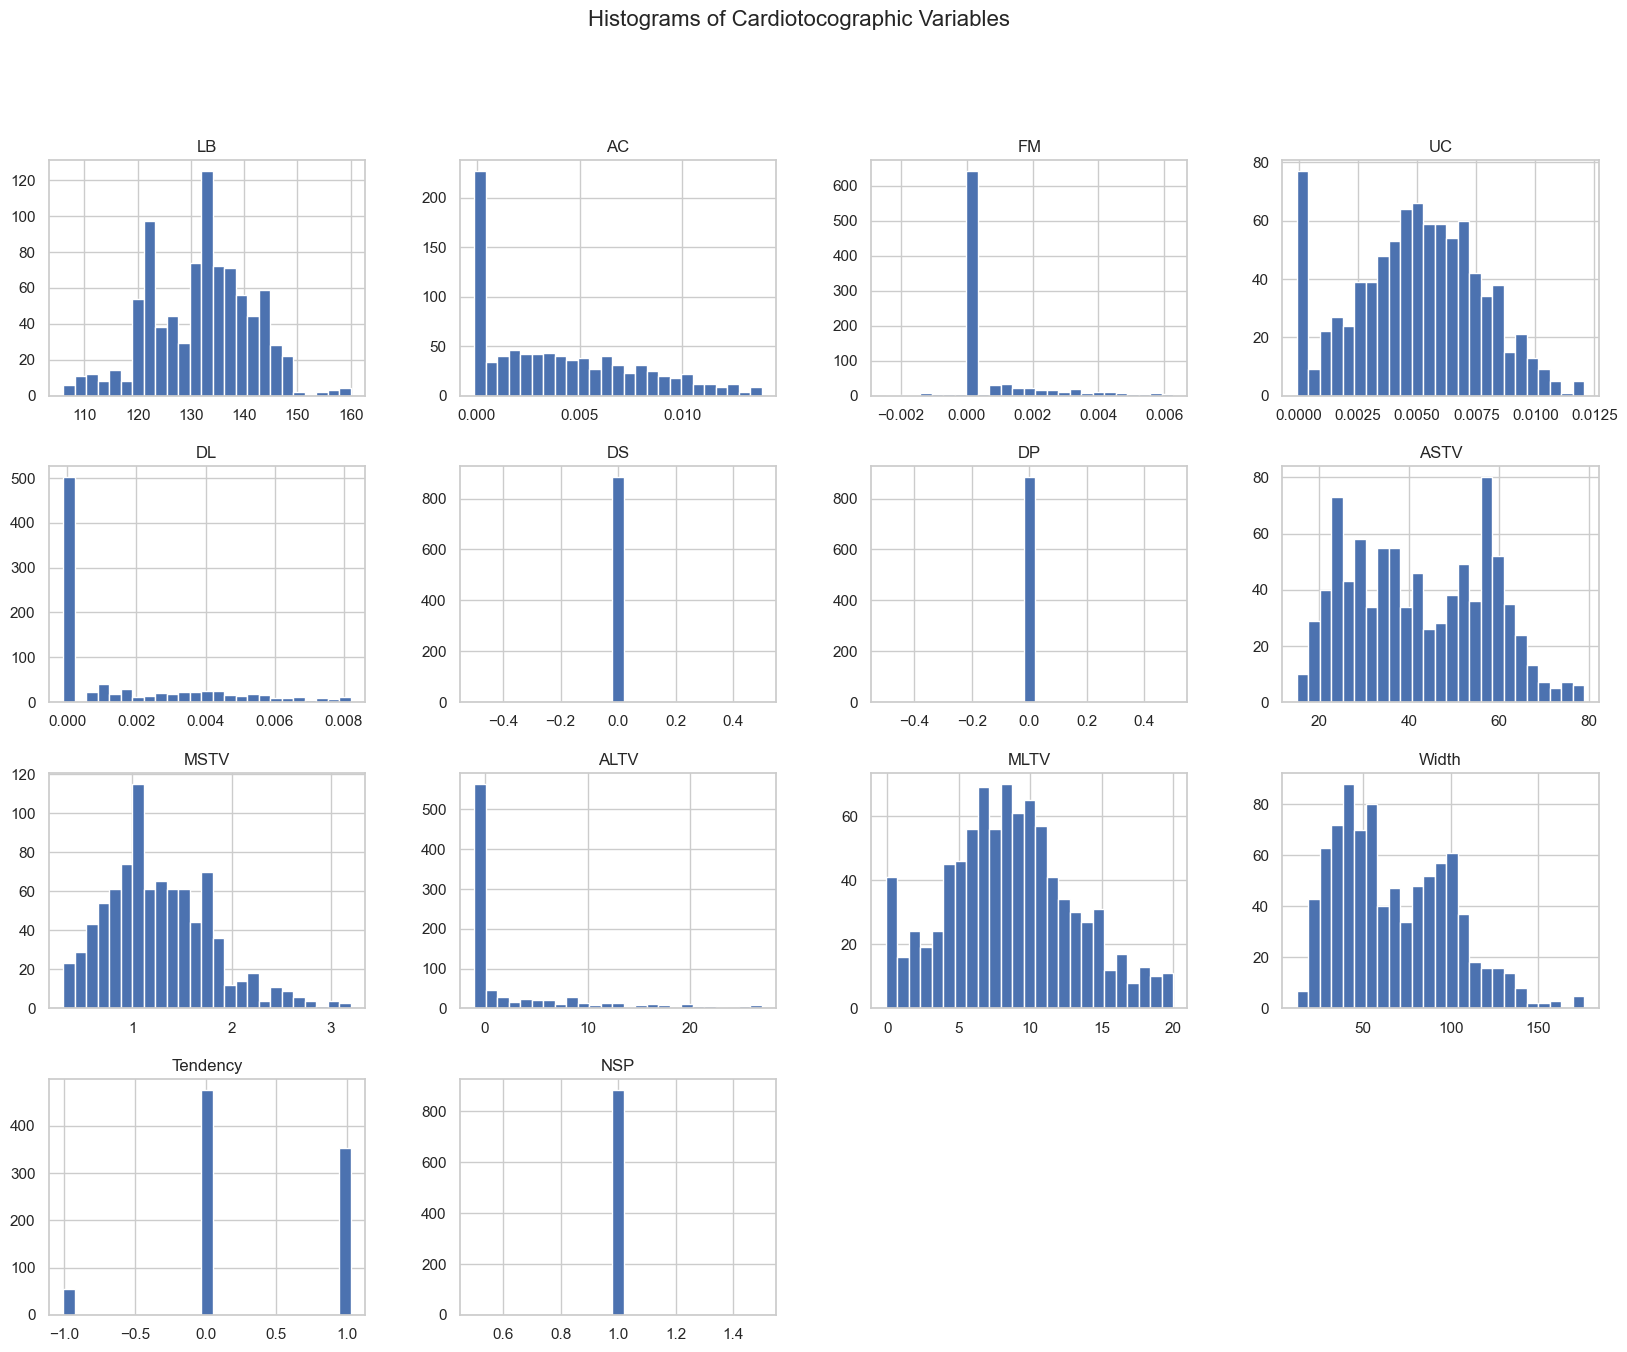

In [10]:
#Histograms
df.hist(figsize=(20, 15), bins=25)
plt.suptitle("Histograms of Cardiotocographic Variables", fontsize=16)
plt.show()

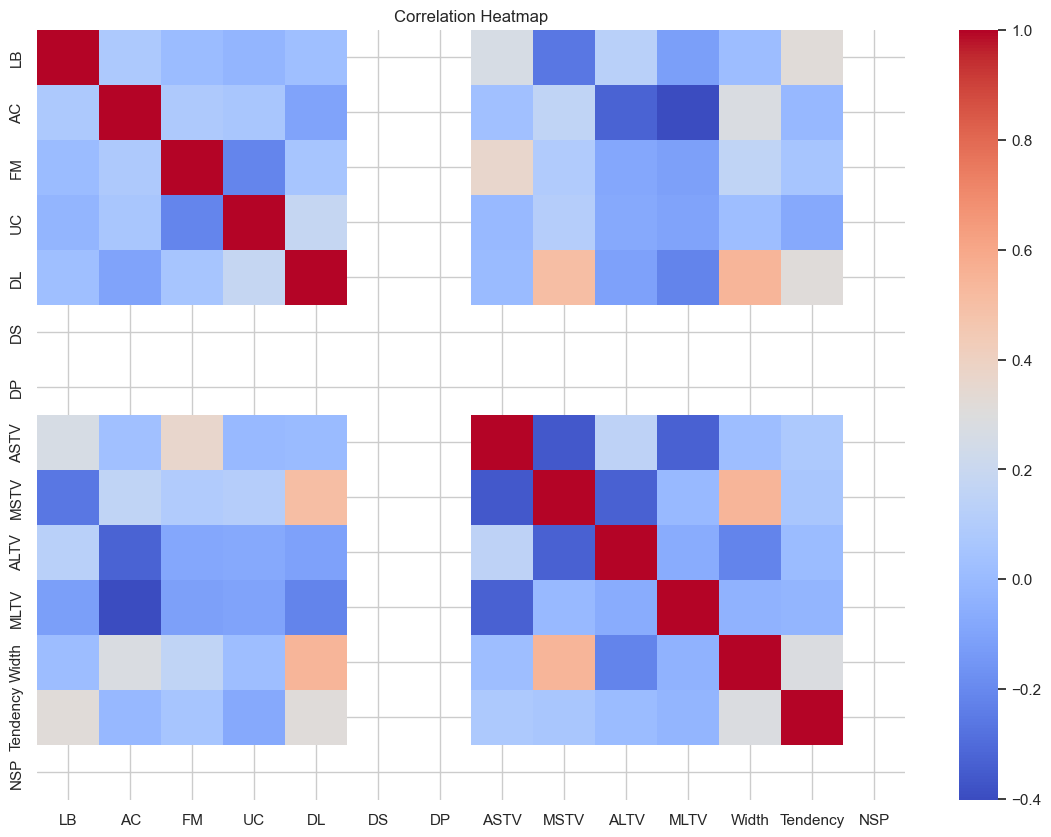

In [11]:
#Correlation Heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

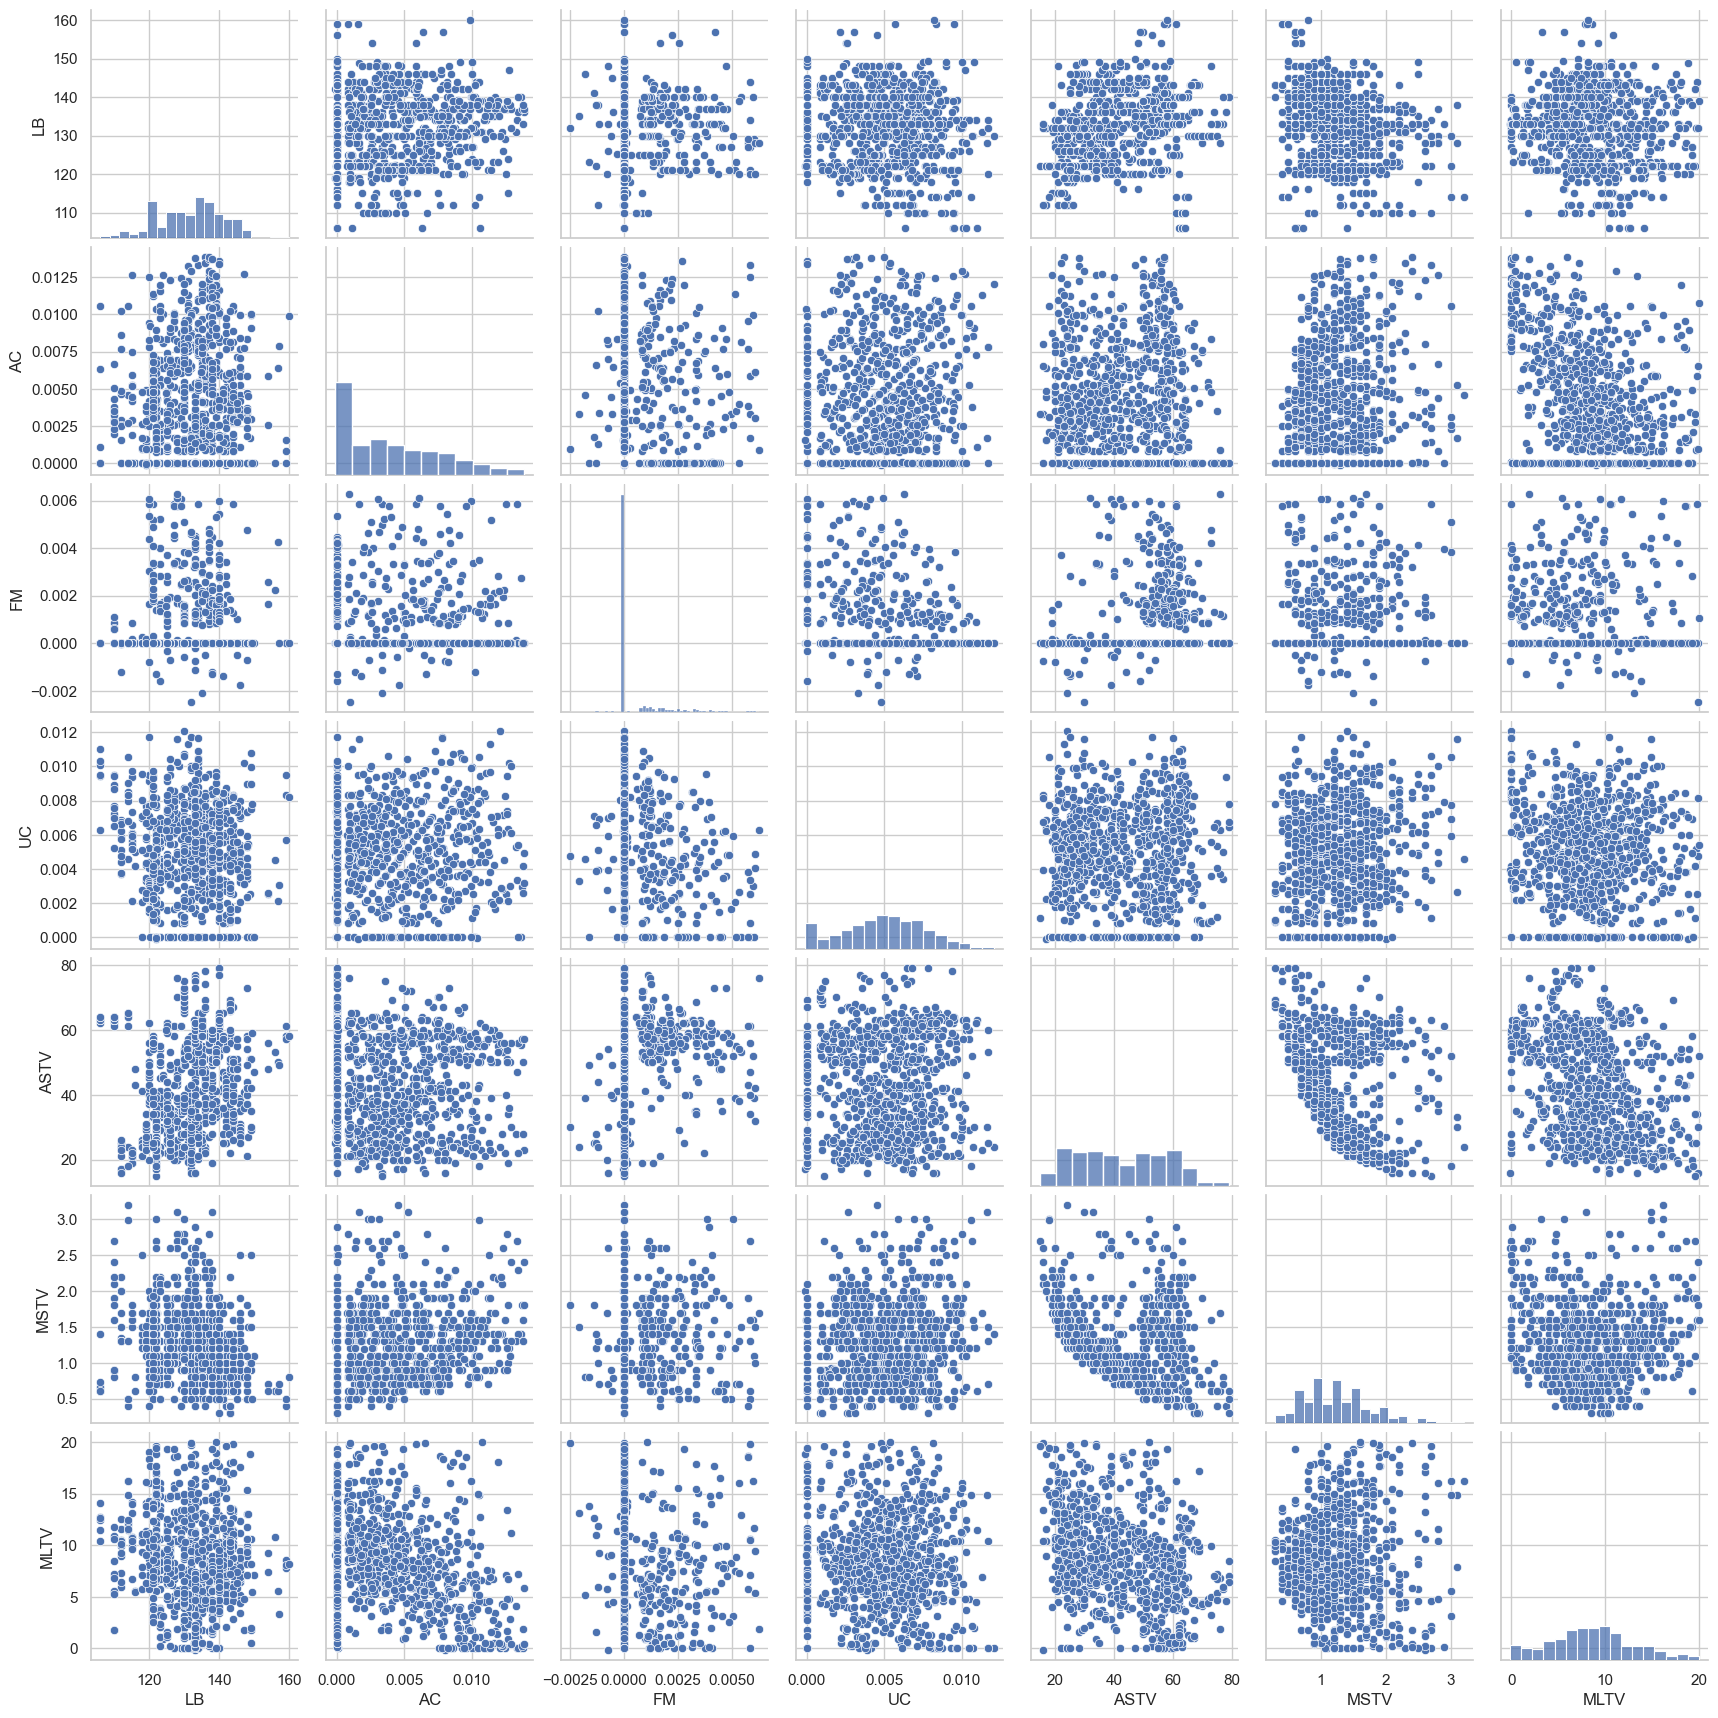

In [19]:
# Pair Plot (Visualization)
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'MLTV']])
plt.show()
